In [96]:
#Data manipulation and preprocessing 
import pandas as pd
import numpy as np

#Data exploration
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

#Model Building
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

### Importing the data

In [58]:
file = open('rwm.data.txt','r') 
line_list = file.readlines() #reading each line in the text file where the dataset is saved

In [63]:
df_list = [] 
for line in line_list:
    sep_l = line.strip().split()#spliting the content in each line and removing white spaces
    df_list.append(sep_l) #saving the resulting list in a new list
df_list[:2]

[['1',
  '0',
  '1984',
  '54',
  '8.000000',
  '0.0000000',
  '0.000000',
  '3050.0000',
  '0',
  '15.00000',
  '1',
  '0',
  '0',
  '1',
  '0',
  '0',
  '1',
  '0',
  '1',
  '0',
  '0',
  '1',
  '0',
  '1',
  '0'],
 ['1',
  '0',
  '1985',
  '55',
  '8.000000',
  '0.0000000',
  '0.000000',
  '4510.0500',
  '0',
  '15.00000',
  '1',
  '0',
  '0',
  '1',
  '0',
  '0',
  '1',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '1',
  '0']]

In [79]:
#using the new list to make a dataframe
#the columns of the dataframe are assigned according to the data dictionary
data = pd.DataFrame(df_list, columns = ['id','female','year','age','hsat','handicapped',
                                        'degree_of_handicap','income','have_kid','years_of_educ',
                                        'marital_status','haupts','reals','polyd','abitur',
                                        'univ','working','bluec','whitec','self','civil',
                                        'docvis','hospvis','public','addon'])
data.head()

,id,female,year,age,hsat,handicapped,degree_of_handicap,income,have_kid,years_of_educ,...,univ,working,bluec,whitec,self,civil,docvis,hospvis,public,addon
0,1,0,1984,54,8.000000,0.0000000,0.000000,3050.0000,0,15.00000,...,0,1,0,1,0,0,1,0,1,0
1,1,0,1985,55,8.000000,0.0000000,0.000000,4510.0500,0,15.00000,...,0,1,0,1,0,0,0,0,1,0
2,1,0,1986,56,7.000000,0.0000000,0.000000,3500.0000,0,15.00000,...,0,1,0,1,0,0,0,0,1,0
3,2,1,1984,44,7.000000,0.0000000,0.000000,3050.0000,0,9.00000,...,0,0,0,0,0,0,0,0,1,0
4,2,1,1985,45,8.000000,0.0000000,0.000000,3182.7790,0,9.00000,...,0,0,0,0,0,0,1,0,1,0


In [80]:
#dropping variables that do not focus on the economic facors of concern
data.drop(['haupts','reals','abitur','addon','id','year'],axis = 1,inplace = True)
data.head()

,female,age,hsat,handicapped,degree_of_handicap,income,have_kid,years_of_educ,marital_status,polyd,univ,working,bluec,whitec,self,civil,docvis,hospvis,public
0,0,54,8.000000,0.0000000,0.000000,3050.0000,0,15.00000,1,1,0,1,0,1,0,0,1,0,1
1,0,55,8.000000,0.0000000,0.000000,4510.0500,0,15.00000,1,1,0,1,0,1,0,0,0,0,1
2,0,56,7.000000,0.0000000,0.000000,3500.0000,0,15.00000,1,1,0,1,0,1,0,0,0,0,1
3,1,44,7.000000,0.0000000,0.000000,3050.0000,0,9.00000,1,0,0,0,0,0,0,0,0,0,1
4,1,45,8.000000,0.0000000,0.000000,3182.7790,0,9.00000,1,0,0,0,0,0,0,0,1,0,1


In [83]:
data.isnull().sum()

female                0
age                   0
hsat                  0
handicapped           0
degree_of_handicap    0
income                0
have_kid              0
years_of_educ         0
marital_status        0
polyd                 0
univ                  0
working               0
bluec                 0
whitec                0
self                  0
civil                 0
docvis                0
hospvis               0
public                0
dtype: int64

In [89]:
x = data.drop('public',axis = 1)
y = data['public']
print(x.columns)
print(y)

Index(['female', 'age', 'hsat', 'handicapped', 'degree_of_handicap', 'income',
       'have_kid', 'years_of_educ', 'marital_status', 'polyd', 'univ',
       'working', 'bluec', 'whitec', 'self', 'civil', 'docvis', 'hospvis'],
      dtype='object')
0        1
1        1
2        1
3        1
4        1
        ..
27321    1
27322    1
27323    1
27324    1
27325    1
Name: public, Length: 27326, dtype: object


In [92]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 40)
print(len(x_train))
print(len(x_test))

21860
5466


In [97]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.74      0.52      0.61       694
           1       0.93      0.97      0.95      4772

    accuracy                           0.92      5466
   macro avg       0.84      0.75      0.78      5466
weighted avg       0.91      0.92      0.91      5466



In [98]:
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)
ada_pred = ada.predict(x_test)
print(classification_report(y_test,ada_pred))

C:\Users\User1\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.73      0.51      0.60       694
           1       0.93      0.97      0.95      4772

    accuracy                           0.91      5466
   macro avg       0.83      0.74      0.77      5466
weighted avg       0.91      0.91      0.91      5466



female 0.017178858232411102
age 0.1413928069130603
hsat 0.07674632144500462
handicapped 0.009707005714914833
degree_of_handicap 0.019036625353378387
income 0.16833348934015682
have_kid 0.019273663282945143
years_of_educ 0.10619068630429948
marital_status 0.016673832436110304
polyd 0.006138602871049693
univ 0.028119083518138483
working 0.02132767721612085
bluec 0.01786185691266748
whitec 0.030149729362017055
self 0.019423964773357175
civil 0.21628893508559263
docvis 0.07380326152327295
hospvis 0.012353599715502612


Text(0.5, 1.0, 'Effect of each variable on the Categorical Boosting model')

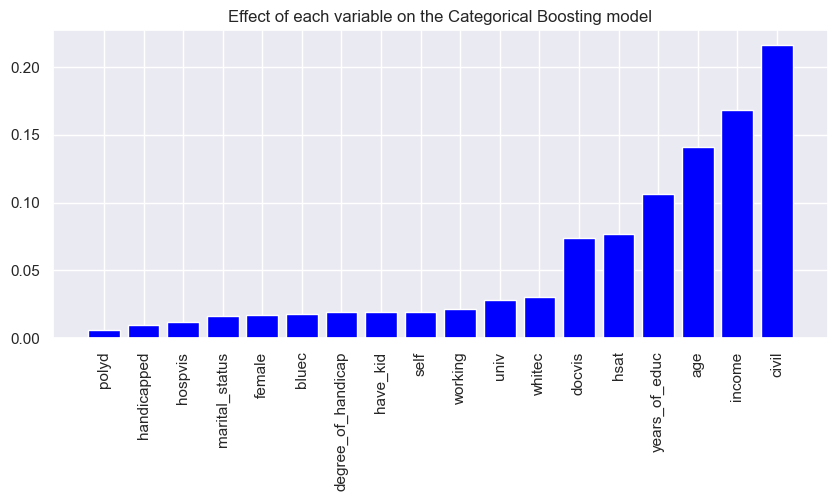

In [107]:
#The effect of the variables on the model
variables =[]
scores = []
for name, score in zip(x_train, rfc.feature_importances_):
    print(name, score)
    variables.append(name)
    scores.append(score)
    
rfc_effect = pd.DataFrame({"Variables": variables,
                         "Effect" : scores})
rfc_effect = rfc_effect.sort_values('Effect')
plt.figure(figsize = (10,4))
plt.bar(rfc_effect["Variables"],
        rfc_effect["Effect"], color = 'blue')
plt.xticks(rotation=90)
plt.title("Effect of each variable on the Categorical Boosting model")

In [108]:
import pickle

In [ ]:
pickle.dump(rfc, open('model.pkl','wb'))
